# Building SRILM SLMs 
This should be the only place that you actually need to train these SLMs, since SRILM will save them and you can load them using the 'use_saved_lms=True' param in build_monthly_SLM_SRILM()
Using these resources for SRILM: https://okapiframework.org/wiki/index.php?title=SRILM_Installation_and_Running_Tutorial, http://www.cs.brandeis.edu/~cs114/CS114_docs/SRILM_Tutorial_20080512.pdf, 
http://www.speech.sri.com/projects/srilm/manpages/ngram-count.1.html

# Comment-based SRILM SLM building 
Interested to see if post and comments are unique in different communities


In [1]:
import os

os.chdir('/homes/gws/taugust/ARK/community_guidelines')

%run Reddit/SRILM_building_funcs.ipynb

/homes/gws/taugust/ARK/community_guidelines


In [3]:
df_posts_test = pd.read_csv('data/cleaned/cleaned_posts_2018.csv')

/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,21,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
os.getcwd()

cd

'/homes/gws/taugust/ARK/community_guidelines'

In [9]:
# 2018 subs CHANGED DIRECTORY OF LMS
subs = ['Cooking', 'mentalhealth', 'Seahawks', 'science', 'politics','news', 'RoastMe']
subs_acc = {}
sub_slms_comments = {}
for i, s in enumerate(subs):
    print('-----------------------------------------------')
    print('Building SLMs for ', colored(s, 'magenta'))
    print('-----------------------------------------------')

    # get author counts for both test and train sets
    # note that comments are the same for both, thats because the authors are all different, so we can pull comments 
    # from the same place
    df_comments, df_author_counts_train = import_csvs(s, path='data/cleaned/train/2018/', ext='_train_2018.csv', comment_pre_path='data/cleaned/sub_comments/', comment_ext='_comments_2018.csv')
        
    # build the SLMs using SRILM, this requires jupyter magic to run the bash commands for SRILM
    # Note that the paths can get weird here since SRILM + its data exists pretty far away from the notebooks
    # The SLMs are just saved in a directory: /homes/gws/taugust/ARK/srilms_LMs
    sub_slms_comments[s] = build_monthly_SLM_SRILM(df_comments, df_author_counts_train, 1, name=s, use_saved_lms=False, kind='comment')
    
    
#     _, df_author_counts_test = import_csvs(s, path='data/cleaned/test/2017/', ext='_test_2017.csv', comment_pre_path='data/cleaned/sub_comments/')
# #     # calculcate the acc gap using the saved SLMs
#     monthly_acc_gaps = calc_acc_gap_SRILM(slms, df_author_counts_test, df_comments, s, kind='comment')
    
#     subs_acc[s] = monthly_acc_gaps
    


-----------------------------------------------
Building SLMs for  Cooking
-----------------------------------------------
Importing  data/cleaned/sub_comments/Cooking_comments_2018.csv ..... Done
Importing  data/cleaned/train/2018/author_counts/Cooking_author_counts_train_2018.csv ..... Done
Creating  1 SLMs  for  month 1 .....
1


/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


Reading text corpus at ../data/srilm_data/Cooking_0_month_1.txt  and writing to count file  ../srilms_LMs/counts/comment_Cooking_0_month_1.count .....Done
Training LM from count file ../srilms_LMs/counts/comment_Cooking_0_month_1.count  to  ../srilms_LMs/comment/Cooking/Cooking_0_month_1.lm ....warning: discount coeff 7 is out of range: 1.21268
Done
Creating  1 SLMs  for  month 2 .....
2
Reading text corpus at ../data/srilm_data/Cooking_0_month_2.txt  and writing to count file  ../srilms_LMs/counts/comment_Cooking_0_month_2.count .....Done
Training LM from count file ../srilms_LMs/counts/comment_Cooking_0_month_2.count  to  ../srilms_LMs/comment/Cooking/Cooking_0_month_2.lm ....warning: discount coeff 4 is out of range: 1.23484
Done
Creating  1 SLMs  for  month 3 .....
3
Reading text corpus at ../data/srilm_data/Cooking_0_month_3.txt  and writing to count file  ../srilms_LMs/counts/comment_Cooking_0_month_3.count .....Done
Training LM from count file ../srilms_LMs/counts/comment_Cookin

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
sub_slms_comments

# Post-based SRILM SLM building -scratch, go to other notebook
Interested to see if post and comments are unique in different communities


In [73]:
%run Reddit/SRILM_building_funcs.ipynb

In [67]:
subs = ['science']
subs_acc = {}
for i, s in enumerate(subs):
    print('-----------------------------------------------')
    print('Building SLMs for ', colored(s, 'magenta'))
    print('-----------------------------------------------')

    # get author counts for both test and train sets
    # note that posts are the same for both, thats because the authors are all different, so we can pull posts 
    # from the same place
    df_posts, df_author_counts_train = import_csvs(s, path='data/cleaned/train/2017/', 
                                                   ext='_train_2017.csv', 
                                                   comment_pre_path='data/cleaned/sub_posts/',
                                                   comment_ext='_posts_2017.csv')
    
    # rename post fulltext as body
    df_posts = df_posts.rename(index=str, columns={'fulltext': 'body'})
#     _, df_author_counts_test = import_csvs(s, path='data/cleaned/test/2017/', ext='_test_2017.csv', comment_pre_path='data/cleaned/sub_posts/')
    
    # build the SLMs using SRILM, this requires jupyter magic to run the bash commands for SRILM
    # Note that the paths can get weird here since SRILM + its data exists pretty far away from the notebooks
    # The SLMs are just saved in a directory: /homes/gws/taugust/ARK/srilms_LMs
    slms = build_monthly_SLM_SRILM(df_posts, df_author_counts_train, slm_count=10, name=s, use_saved_lms=False, kind='post', num_authors=20, threshold_count=3)

    # calculcate the acc gap using the saved SLMs
    
#     subs_acc[s] = monthly_acc_gaps

-----------------------------------------------
Acculturation Gap for  science
-----------------------------------------------
Importing  data/cleaned/sub_posts/science_posts_2017.csv ..... Done
Importing  data/cleaned/train/2017/author_counts/science_author_counts_train_2017.csv ..... Done
Creating  10 SLMs  for  month 1 .....
21
1
Reading text corpus at ../data/srilm_data/science_0_month_1.txt  and writing to count file  ../srilms_LMs/counts/post_science_0_month_1.count .....

/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


Done
Training LM from count file ../srilms_LMs/counts/post_science_0_month_1.count  to  ../srilms_LMs/post/science/science_0_month_1.lm ....warning: discount coeff 6 is out of range: 1.17086
Done
21
1
Reading text corpus at ../data/srilm_data/science_1_month_1.txt  and writing to count file  ../srilms_LMs/counts/post_science_1_month_1.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_1_month_1.count  to  ../srilms_LMs/post/science/science_1_month_1.lm ....warning: discount coeff 5 is out of range: 1.20475
Done
21
1
Reading text corpus at ../data/srilm_data/science_2_month_1.txt  and writing to count file  ../srilms_LMs/counts/post_science_2_month_1.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_2_month_1.count  to  ../srilms_LMs/post/science/science_2_month_1.lm ....warning: discount coeff 5 is out of range: 1.20505
Done
21
1
Reading text corpus at ../data/srilm_data/science_3_month_1.txt  and writing to count file  ../srilms_L

Training LM from count file ../srilms_LMs/counts/post_science_5_month_3.count  to  ../srilms_LMs/post/science/science_5_month_3.lm ....warning: count of count 8 is zero -- lowering maxcount
Done
24
3
Reading text corpus at ../data/srilm_data/science_6_month_3.txt  and writing to count file  ../srilms_LMs/counts/post_science_6_month_3.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_6_month_3.count  to  ../srilms_LMs/post/science/science_6_month_3.lm ....warning: discount coeff 6 is out of range: 1.18
Done
24
3
Reading text corpus at ../data/srilm_data/science_7_month_3.txt  and writing to count file  ../srilms_LMs/counts/post_science_7_month_3.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_7_month_3.count  to  ../srilms_LMs/post/science/science_7_month_3.lm ....warning: discount coeff 6 is out of range: 3.60782
Done
24
3
Reading text corpus at ../data/srilm_data/science_8_month_3.txt  and writing to count file  ../srilms_LMs/c

Done
25
4
Reading text corpus at ../data/srilm_data/science_8_month_4.txt  and writing to count file  ../srilms_LMs/counts/post_science_8_month_4.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_8_month_4.count  to  ../srilms_LMs/post/science/science_8_month_4.lm ....warning: discount coeff 5 is out of range: 1.20955
Done
25
4
Reading text corpus at ../data/srilm_data/science_9_month_4.txt  and writing to count file  ../srilms_LMs/counts/post_science_9_month_4.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_9_month_4.count  to  ../srilms_LMs/post/science/science_9_month_4.lm ....warning: discount coeff 6 is out of range: 2.36364
Done
Creating  10 SLMs  for  month 5 .....
25
5
Reading text corpus at ../data/srilm_data/science_0_month_5.txt  and writing to count file  ../srilms_LMs/counts/post_science_0_month_5.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_0_month_5.count  to  ../srilms_LMs/post/sc

Done
24
7
Reading text corpus at ../data/srilm_data/science_3_month_7.txt  and writing to count file  ../srilms_LMs/counts/post_science_3_month_7.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_3_month_7.count  to  ../srilms_LMs/post/science/science_3_month_7.lm ....warning: discount coeff 2 is out of range: 1.43823
Done
24
7
Reading text corpus at ../data/srilm_data/science_4_month_7.txt  and writing to count file  ../srilms_LMs/counts/post_science_4_month_7.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_4_month_7.count  to  ../srilms_LMs/post/science/science_4_month_7.lm ....warning: count of count 8 is zero -- lowering maxcount
Done
24
7
Reading text corpus at ../data/srilm_data/science_5_month_7.txt  and writing to count file  ../srilms_LMs/counts/post_science_5_month_7.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_5_month_7.count  to  ../srilms_LMs/post/science/science_5_month_7.lm ....war

Done
24
8
Reading text corpus at ../data/srilm_data/science_6_month_8.txt  and writing to count file  ../srilms_LMs/counts/post_science_6_month_8.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_6_month_8.count  to  ../srilms_LMs/post/science/science_6_month_8.lm ....warning: count of count 8 is zero -- lowering maxcount
Done
24
8
Reading text corpus at ../data/srilm_data/science_7_month_8.txt  and writing to count file  ../srilms_LMs/counts/post_science_7_month_8.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_7_month_8.count  to  ../srilms_LMs/post/science/science_7_month_8.lm ....warning: count of count 8 is zero -- lowering maxcount
Done
24
8
Reading text corpus at ../data/srilm_data/science_8_month_8.txt  and writing to count file  ../srilms_LMs/counts/post_science_8_month_8.count .....Done
Training LM from count file ../srilms_LMs/counts/post_science_8_month_8.count  to  ../srilms_LMs/post/science/science_8_month_8.lm ...

ValueError: Cannot take a larger sample than population when 'replace=False'

In [6]:
# scratch for calculating acc gap
slms_politics = build_monthly_SLM_SRILM(None, None, slm_count=10, name='politics', use_saved_lms=True, kind='post', num_authors=20, threshold_count=3)
df_posts_politics, df_author_counts_test_politics = import_csvs('politics', 
                                                               path='data/cleaned/test/2017/', 
                                                               ext='_test_2017.csv', 
                                                               comment_pre_path='data/cleaned/sub_posts/', 
                                                               comment_ext='_posts_2017.csv')

df_posts_politics = df_posts_politics.rename(index=str, columns={'fulltext': 'body'})
monthly_acc_gaps = calc_acc_gap_SRILM(slms_politics, df_author_counts_test_politics, df_posts_politics, 'politics', kind='post',
                                       num_active_authors=5, num_active_posts=10, num_outside_authors=50, num_outside_posts=1)


Importing  data/cleaned/sub_posts/politics_posts_2017.csv ..... 

/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


Done
Importing  data/cleaned/test/2017/author_counts/politics_author_counts_test_2017.csv ..... Done
Calculating cross entropy for month 1 .....
14
sampled active users: 5 sampled outside users: 50
sampled active comments: 50 sampled outside comments: 50


/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


[7.528631482000027, 7.593131881285492, 7.395368756930916, 7.593896771149386, 7.407611080562478, 7.397133815053546, 7.4371744626322895, 7.670944405311721, 7.62452644444811, 7.52443671670838] [7.772641844627297, 7.6207872594994, 7.626673482596419, 7.74267793738303, 7.588958186913335, 7.612255912807851, 7.725049904016963, 7.521827327387623, 7.73142493792659, 7.570193463132756]
Saving acc gap for month 1
Calculating cross entropy for month 2 .....
8
sampled active users: 5 sampled outside users: 50
sampled active comments: 50 sampled outside comments: 50
[7.297848038257452, 7.114548183422452, 7.291763774915843, 7.231514010882488, 7.337370356106553, 7.175060460862701, 7.26186361968837, 7.218407273818955, 7.2246451945955465, 7.271985851749723] [7.611938092034121, 7.707328759233991, 7.512912667457287, 7.541071827892929, 7.726547199353264, 7.49578468879382, 7.526386557808268, 7.564765314988341, 7.6127918463228985, 7.592661840575757]
Saving acc gap for month 2
Calculating cross entropy for mont

In [7]:
monthly_acc_gaps_post_post = monthly_acc_gaps

In [8]:
df_comments_politics, _ = import_csvs('politics', path='data/cleaned/test/2017/', ext='_test_2017.csv', comment_pre_path='data/cleaned/sub_comments/', comment_ext='_comments_2017.csv')

Importing  data/cleaned/sub_comments/politics_comments_2017.csv ..... Done
Importing  data/cleaned/test/2017/author_counts/politics_author_counts_test_2017.csv ..... Done


In [9]:
monthly_acc_gaps_post_comment = calc_acc_gap_SRILM(slms_politics, df_author_counts_test_politics, df_comments_politics, 'politics', kind='comment',
                                       num_active_authors=5, num_active_posts=10, num_outside_authors=50, num_outside_posts=1)

Calculating cross entropy for month 1 .....
5630
sampled active users: 5 sampled outside users: 50
sampled active comments: 50 sampled outside comments: 50


/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


[8.256316739154606, 8.23045089762713, 8.385101388586524, 8.27466654694049, 8.184875342908285, 8.358839299362133, 8.454262274597934, 8.219884848858594, 8.330907469203234, 8.457186728098971] [8.339899872962363, 8.361405184001233, 8.308366791511892, 8.458142864065465, 8.268838579025276, 8.473213404272288, 8.342766284470326, 8.307917537783469, 8.366052886033435, 8.491537672684979]
Saving acc gap for month 1
Calculating cross entropy for month 2 .....
5210
sampled active users: 5 sampled outside users: 50
sampled active comments: 50 sampled outside comments: 50
[8.2626191955643, 8.274728970295543, 8.335136632451679, 8.3100005855766, 8.533150601153384, 8.241741052064175, 8.278258480150058, 8.190967886206414, 8.279462473782475, 8.127865903799144] [8.17040882426736, 8.270125230292932, 8.225596924077108, 8.234869630591051, 8.404970797965124, 8.160832476947292, 8.12304328318727, 8.160939846864038, 8.172897495632155, 8.176580587454136]
Saving acc gap for month 2
Calculating cross entropy for mont

In [10]:
monthly_acc_gaps_post_post

{1: {'gap': 0.01782072033403191, 'var': 0.0015988256430616438},
 2: {'gap': 0.04787271945233209, 'var': 0.0009298409335691064},
 3: {'gap': 0.020982304247559754, 'var': 0.0014643746090735083},
 4: {'gap': 0.011215043969182716, 'var': 0.0010249414073244456},
 5: {'gap': 0.061873148868428963, 'var': 0.0026542588242499457},
 6: {'gap': 0.041480162939559966, 'var': 0.0007355284137074598},
 7: {'gap': 0.013597838545592473, 'var': 0.002047522191463303},
 8: {'gap': 0.04364861621524277, 'var': 0.0012365102478936844},
 9: {'gap': -0.001777743972589261, 'var': 0.0012694952293498363},
 10: {'gap': 0.016917827215814342, 'var': 0.00104682700656468},
 11: {'gap': 0.02202678942905259, 'var': 0.010394277135841158},
 12: {'gap': -0.020628586643817455, 'var': 0.001075784044599449}}

In [11]:
monthly_acc_gaps_post_comment

{1: {'gap': 0.006802556736768533, 'var': 0.0013768227243573512},
 2: {'gap': -0.00885707907364126, 'var': 0.0015971575883881334},
 3: {'gap': -0.018071881804019228, 'var': 0.002587569015979361},
 4: {'gap': -0.011100057671849314, 'var': 0.0007734217117625602},
 5: {'gap': -0.02038228245669987, 'var': 0.0020451341548579},
 6: {'gap': -0.027001066052578942, 'var': 0.0019457882628625862},
 7: {'gap': 0.03130607081168038, 'var': 0.002867999510128722},
 8: {'gap': 0.009242617606897409, 'var': 0.0018155675859783849},
 9: {'gap': -0.007516369073309781, 'var': 0.0010340700475156917},
 10: {'gap': -0.0213664606674832, 'var': 0.001030096484484296},
 11: {'gap': -0.004821826152704168, 'var': 0.001937672447076439},
 12: {'gap': 0.005666114116051915, 'var': 0.0004993738980161645}}

In [12]:

gaps_post_post = [monthly_acc_gaps_post_post[m]['gap'] for m in range(1,13)]

gaps_post_comments = [monthly_acc_gaps_post_comment[m]['gap'] for m in range(1,13)]

#     print(gap, var)
#     gaps.append(gap)
#     variances.append(var)
# ax = sns.scatterplot(x=var, y=gaps)
    
# ax.set_title('Acculturation Gap mean and variance', fontsize=10)
# ax.set_xlabel('Variance', fontsize=10)
# ax.set_ylabel('Gap')

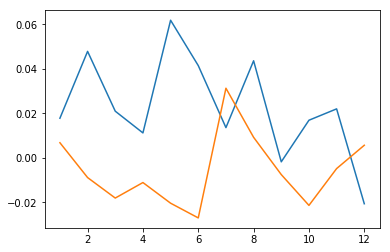

In [17]:
ax = sns.lineplot(y=gaps_post_post, x=range(1,13))

sns.lineplot(y=gaps_post_comments, x=range(1,13), ax=ax)

